In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/sample_submission.csv
/kaggle/input/heart-disease-uci/processed.cleveland.test.data
/kaggle/input/heart-disease-uci/processed.cleveland.train.data
/kaggle/input/submission-test/submission (1).csv


In [2]:
col_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
train_data = pd.read_csv("../input/heart-disease-uci/processed.cleveland.train.data", header=None, names = col_names)
test_data = pd.read_csv("../input/heart-disease-uci/processed.cleveland.test.data", header=None, names = col_names)

# The Dataset

Let's get a general view of the data first. The following are the features taken from the dataset description.

* age. The age of the patient.
* sex. The gender of the patient. (1 = male, 0 = female).
* cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).
* trestbps. Resting blood pressure in mmHg.
* chol. Serum Cholestero in mg/dl.
* fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
* restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
* thalach. Max heart rate achieved.
* exang. Exercise induced angina (1 = yes, 0 = no).
* oldpeak. ST depression induced by exercise relative to rest.
* slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
* ca. Number of major vessels (0–3) colored by flourosopy.
* thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
* num. Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).

In [3]:
train_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,58.0,0.0,4.0,130.0,197.0,0.0,0.0,131.0,0.0,0.6,2.0,0.0,3.0,0
1,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
2,53.0,1.0,4.0,142.0,226.0,0.0,2.0,111.0,1.0,0.0,1.0,0.0,7.0,0
3,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0,2
4,54.0,1.0,2.0,192.0,283.0,0.0,2.0,195.0,0.0,0.0,1.0,1.0,7.0,1


Our continuous features are: 
* age
* trestbps
* chol
* thalach
* oldpeak

Our categorical features are:
* sex
* cp
* fbs
* restecg
* exang
* slope
* ca
* thal

Our target is also categorical.

In [4]:
cat_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
num_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

train_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,54.013072,0.666667,3.156863,131.019608,244.692810,0.143791,1.078431,150.294118,0.333333,0.941830,1.614379,4.653595,0.973856
std,9.387132,0.472953,0.967346,18.019168,53.581011,0.352030,0.996899,23.001969,0.472953,1.079267,0.619042,1.961204,1.266718
min,29.000000,0.000000,1.000000,100.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,208.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,236.000000,0.000000,2.000000,153.000000,0.000000,0.600000,2.000000,3.000000,0.000000
75%,60.000000,1.000000,4.000000,140.000000,274.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,7.000000,4.000000


Checking for null values.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       153 non-null    float64
 1   sex       153 non-null    float64
 2   cp        153 non-null    float64
 3   trestbps  153 non-null    float64
 4   chol      153 non-null    float64
 5   fbs       153 non-null    float64
 6   restecg   153 non-null    float64
 7   thalach   153 non-null    float64
 8   exang     153 non-null    float64
 9   oldpeak   153 non-null    float64
 10  slope     153 non-null    float64
 11  ca        153 non-null    object 
 12  thal      153 non-null    float64
 13  num       153 non-null    int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 16.9+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       150 non-null    float64
 1   sex       150 non-null    float64
 2   cp        150 non-null    float64
 3   trestbps  150 non-null    float64
 4   chol      150 non-null    float64
 5   fbs       150 non-null    float64
 6   restecg   150 non-null    float64
 7   thalach   150 non-null    float64
 8   exang     150 non-null    float64
 9   oldpeak   150 non-null    float64
 10  slope     150 non-null    float64
 11  ca        150 non-null    object 
 12  thal      150 non-null    object 
 13  num       0 non-null      float64
dtypes: float64(12), object(2)
memory usage: 16.5+ KB


In [7]:
train_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

It seems like there are no values that are Null, but maybe they are string types instead. We need to inspect the data deeper.

In [8]:
for col in col_names:
    print(col, "\n", train_data[col].unique(), sep="")


age
[58. 57. 53. 51. 54. 46. 65. 48. 67. 38. 39. 52. 47. 71. 43. 34. 60. 42.
 59. 55. 56. 68. 50. 45. 49. 35. 61. 29. 70. 37. 63. 41. 62. 64. 44. 40.
 66. 77. 69.]
sex
[0. 1.]
cp
[4. 2. 3. 1.]
trestbps
[130. 120. 142. 192. 150. 132. 152. 138. 118. 112. 108. 110. 128. 102.
 165. 140. 180. 200. 134. 100. 129. 135. 136. 122. 125. 170. 105. 144.
 101. 174. 155. 154. 104. 106. 146. 178. 145. 115. 124. 160. 126. 156.
 148.]
chol
[197. 354. 226. 305. 283. 231. 177. 288. 245. 212. 175. 246. 219. 230.
 243. 149. 211. 255. 210. 318. 256. 236. 247. 289. 188. 209. 258. 327.
 294. 409. 311. 299. 271. 185. 196. 229. 234. 304. 269. 319. 192. 330.
 300. 204. 322. 326. 215. 195. 274. 200. 235. 208. 340. 193. 263. 249.
 213. 265. 241. 232. 223. 233. 167. 186. 353. 278. 203. 270. 293. 239.
 206. 240. 307. 564. 201. 207. 214. 254. 321. 131. 174. 244. 205. 277.
 218. 313. 282. 286. 250. 166. 273. 303. 199. 182. 220. 221. 242. 284.
 183. 276.]
fbs
[0. 1.]
restecg
[0. 2. 1.]
thalach
[131. 163. 111. 142. 195.

In [9]:
train_data.ca.value_counts()

0.0    89
1.0    37
2.0    17
3.0     7
?       3
Name: ca, dtype: int64

Seems like there are three "?" values in the ca feature. We might fill them with the median value or drop them depending on the size of our dataset.

# Exploratory Analysis

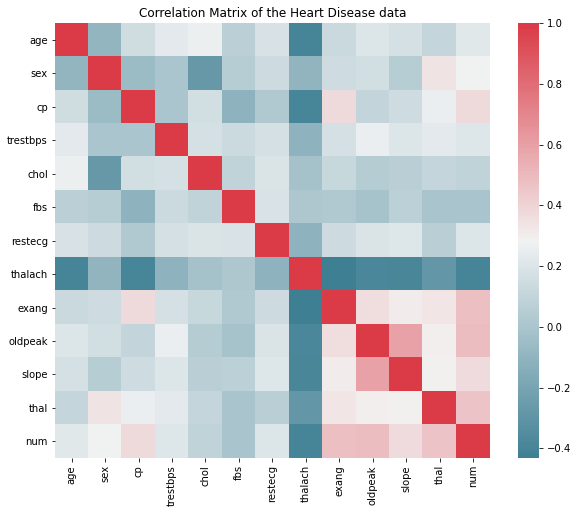

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
ax.title.set_text('Correlation Matrix of the Heart Disease data')
corr = train_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

Data shows the correlation between indicators from the table. So, negatively most correlated values were max heart rate achieved and age, which suggests that the maximum pressure indicators are highly dependent of a person's age.

The most meaningful connection is observed in Diagnosis of heart disease and such values as the presence or absence of detected angina (exang), angina ST indicators (oldpeak), as well as thalassemia (thal) and peak exercise ST segment (slope). 

This means that the diagnosis of a particular type of heart disease depends on the above indicators, the sum of the results of which gives an idea of the type of human disease (diagnosis of the type of disease is directly related to the symptoms).

Let's plot pairwise scatter plots for continuous features.

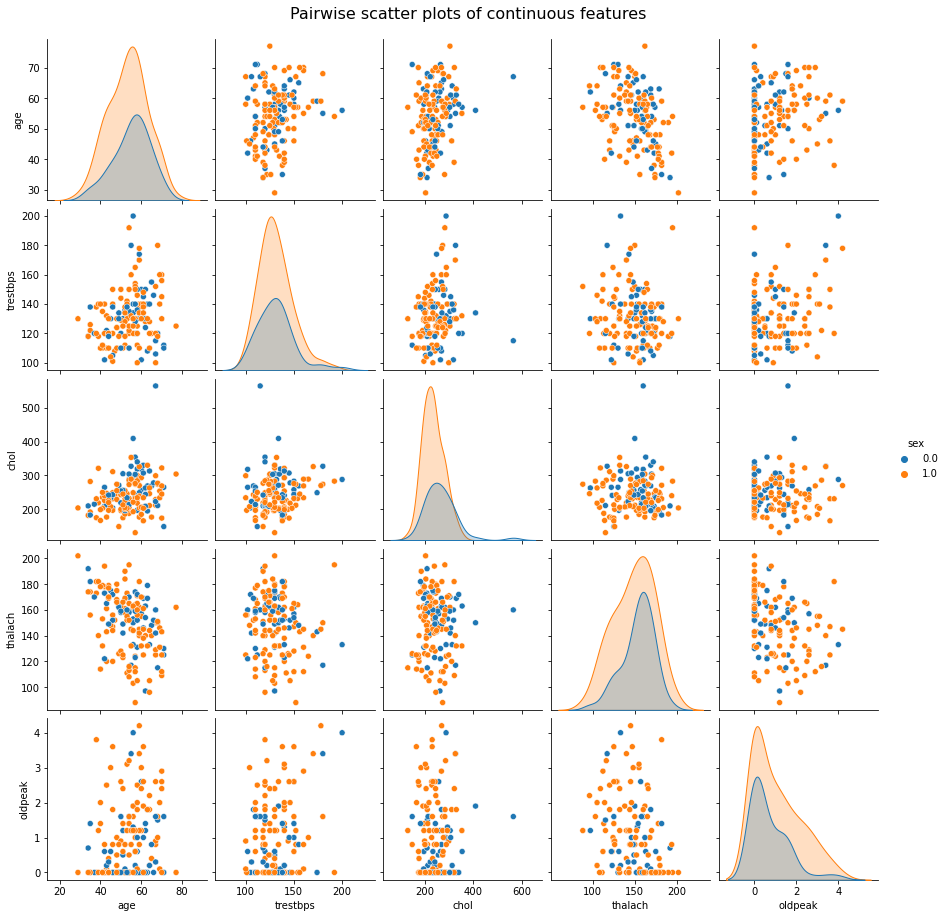

In [11]:
new_features = num_features.copy()
new_features.append("sex")
g= sns.pairplot(data=train_data[new_features], hue="sex")
g.fig.suptitle("Pairwise scatter plots of continuous features", y=1.02, fontsize=16);

This plots shows the correlation of values to each other. So, for example, deviating indicators for Serum Cholestero are observed in people over 60

Also, Resting blood pressure is fairly uniform with an increase in the Max heart rate

The most frequent indicators of Resting blood pressure are observed at 3-4 ST depression types induced by exercise relative to rest, which suggests a general increase in angina pectoris in these types of diagnostics 

this graph shows the distribution of all indicators for heart disease relative to comparison by gender (1(orange) - men, 0(blue) - women)

For example, the Serum Cholestero score is generally lower in men than in women. Also, mostly men are subjected to typical angina, and women - to non-anginal pain

Interesting that only the second 'num' type has an ST-T wave abnormality in a woman, because the rest of the types are manifested in men

Also interesting that any kind of sloping with resting blood pressure is observed in men on average, and in deviating (low and high) values are more typical for women

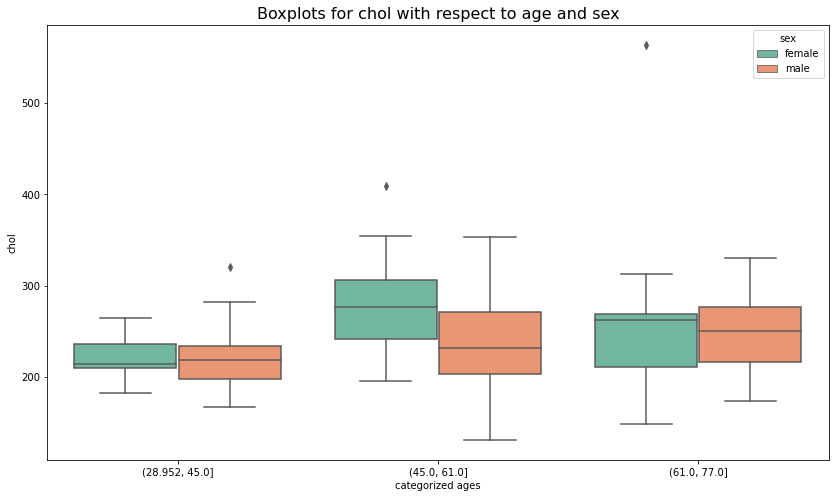

In [12]:
train_data["categorized ages"] = pd.cut(train_data["age"], 3)

fig, ax = plt.subplots(figsize=(14,8))

f = sns.boxplot(x="categorized ages", y="chol", data=train_data, hue="sex", palette="Set2");

f.legend_.texts[1].set_text("male")
f.legend_.texts[0].set_text("female")
f.axes.set_title("Boxplots for chol with respect to age and sex", fontsize=16)
plt.show()

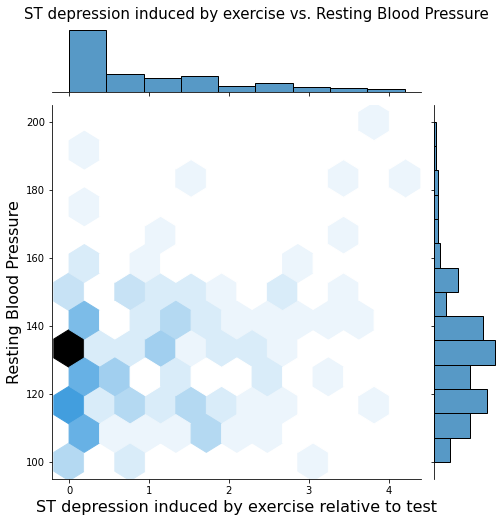

In [13]:
g = sns.jointplot(x='oldpeak',y='trestbps',data=train_data, height=7,kind='hex')
g.set_axis_labels('ST depression induced by exercise relative to test', 'Resting Blood Pressure', fontsize=16)
g.fig.suptitle("ST depression induced by exercise vs. Resting Blood Pressure", y=1.02, fontsize=15);

The most common value that appeared for people with low angina at rest is 130-135 mmHg (strange, that the normal pressure is lower like 120 or smth like that)

As the risk of high resting blood pressure increased, the number of people who had these symptoms decreased. 

For example, there were cases of high (180-200 mmHg) blood pressure, but the number of people with these indicators was small

It's in general indicates a low risk of oldpick and ST depression with a normal average of blood pressure

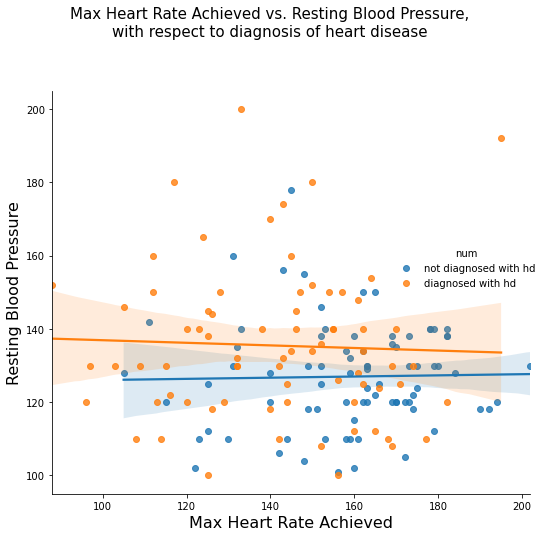

In [14]:
data_vis = train_data['num'].replace([1, 2, 3, 4], 1)
data = train_data.drop('num', axis=1)
data['num']= data_vis

f = sns.lmplot(x='thalach', y='trestbps', data=data, hue='num', height=7)

new_labels = ['not diagnosed with hd', 'diagnosed with hd']
for t, l in zip(f._legend.texts, new_labels): t.set_text(l)

f.set_axis_labels('Max Heart Rate Achieved', 'Resting Blood Pressure', fontsize=16)
f.fig.suptitle("Max Heart Rate Achieved vs. Resting Blood Pressure,\nwith respect to diagnosis of heart disease", y=1.06, fontsize=15)
plt.tight_layout();

This plot shows that healthy people have an increasing in Resting blood pressure, that provokes Max heart rate, while diagnostic unhealthy patients have this value decreased, which indicates abnormaliries in the heart system

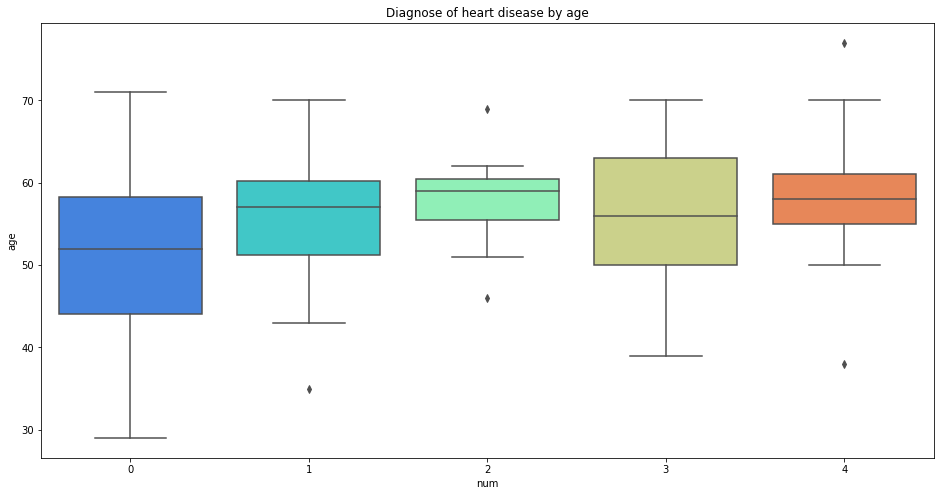

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
ax.title.set_text('Diagnose of heart disease by age')
sns.boxplot(x="num", y="age", data=train_data, palette='rainbow');

On the boxplot, values for the diagnosis of heart treatment and age indicators are presented. The greatest scatter of values is observed in representatives with no diseases and an average age of about 52 years.

the most densely grouped category is contained in 2 diagnostics, where people of 56-60 years old are concentrated with a small number of point emissions by the age of 70 and 45 years.

Obviously, the most common average age for heart disease in any of the diagnoses is 55-57 years. In most diagnostics, the 25% quartile is a larger age range than the upper 75%, which is the basis for the conclusion that when the average age of incidence is reached, there is a greater risk and the number of cases remains in a small age range.

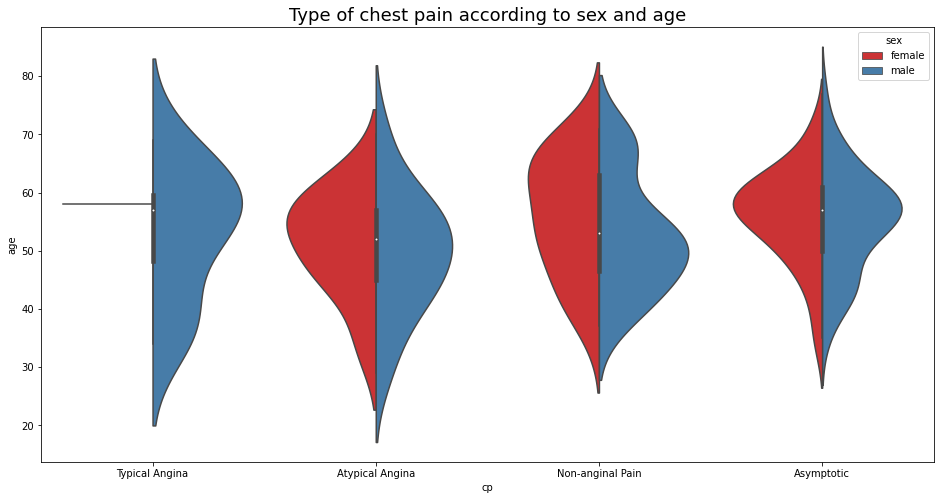

In [16]:
fig, ax = plt.subplots(figsize=(16,8))
f = sns.violinplot(x="cp", y="age", data=train_data, hue='sex', split=True, palette='Set1')
f.legend_.texts[1].set_text("male")
f.legend_.texts[0].set_text("female")
ax.set_title("Type of chest pain according to sex and age", size=18)
ax.set_xticklabels(['Typical Angina','Atypical Angina','Non-anginal Pain','Asymptotic']);

women practically do not get a typical angina, but they are more susceptible

to serious diseases compared to men (the most likely disease is 50-60 years)

Men are highly prone to anginal pain closer to 45 y.o

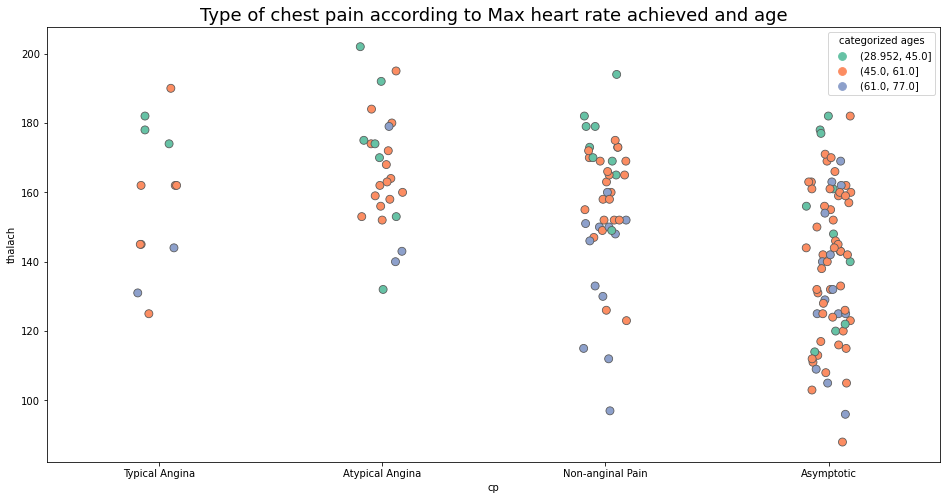

In [17]:
fig, ax = plt.subplots(figsize=(16,8))
sns.stripplot(data=train_data,x="cp", y="thalach", hue="categorized ages", linewidth=0.8, palette="Set2", size=8)
ax.set_title("Type of chest pain according to Max heart rate achieved and age", size=18)
ax.set_xticklabels(['Typical Angina','Atypical Angina','Non-anginal Pain','Asymptotic']);

in people with asymptotic, on average, a lower Max heart rate is achieve

In case of atypical angina this indicator is the highest

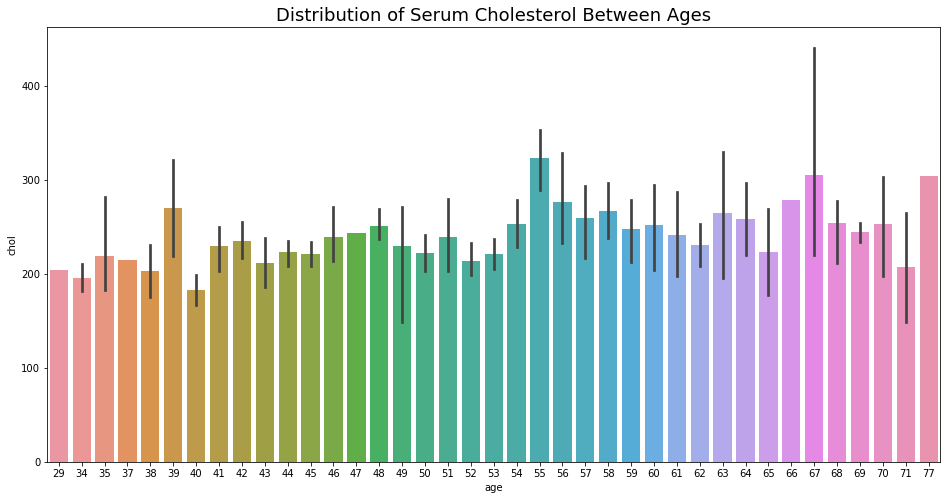

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
train_data["age"] = train_data["age"].astype(int)
sns.barplot(data=train_data, x="age", y="chol")
ax.set_title("Distribution of Serum Cholesterol Between Ages", size=18);

This graph shows n the patient's age and the amount of Serum Cholestero in mg / dl. Visualization showed that the highest indicator is observed at 55 years old, after which there is a gradual decrease until reaching 67-77 years old, where the indicators grow again

The general trend shows that the number of Serum Cholestero on average increases due to age, despite deviating cases when this indicator reaches the norm (or even below the norm) at the age of over 50

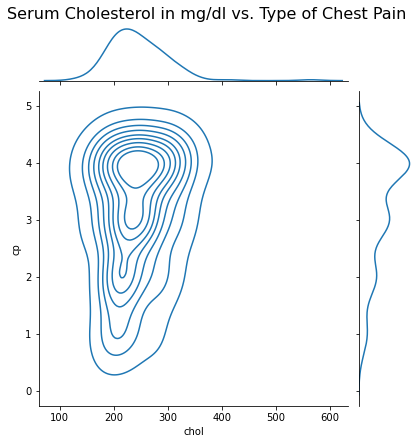

In [19]:
g = sns.jointplot(x="chol", y="cp", data=train_data, kind='kde')
g.fig.suptitle("Serum Cholesterol in mg/dl vs. Type of Chest Pain", y=1.02, fontsize=16);

cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).
chol. Serum Cholestero in mg/dl.

This plot shows the correlation between the type of chest pain and the amount of Serum Cholestero in mg / dl

According to the data obtained as a result of plotting the picture, it can be seen that the most frequent indicator of normal Serum Cholestero in the concentration of cases is manifested in asymptotic angina, which is much less common for, for example, typical angina.

Deviations in the direction of decreasing and increasing Serum Cholestero are most often observed in asymptotic and non-anginal pain, which indicates an even distribution of data, where the most frequent cases are with asymptotic disease and more rare with common typical angina

# Preprocessing

Imputing missing values.

In [20]:
import statistics 
from statistics import mode 
from statistics import median


for feature in cat_features:
    mode_value_train = mode(train_data[feature])
    
    train_data[feature] = train_data[feature].replace('?',mode_value_train)
    test_data[feature] = test_data[feature].replace('?',mode_value_train)
    
for feature in num_features:
    median_value_train = median(train_data[feature])
    
    train_data[feature] = train_data[feature].replace('?',median_value_train)
    test_data[feature] = test_data[feature].replace('?',median_value_train)


Split the data into target and features (X and y).

In [21]:
X_train = train_data.drop(["num", "categorized ages"], axis=1)
y_train = train_data["num"]

First, we fix our target to either 0 or 1.

In [22]:
y_train = y_train.replace([1, 2, 3, 4], 1)

Feature extraction

We need to do one-hot encoding to our categorical features so that our machine learning algorithms work better. But we do not need to encode the features which are only 0 and 1, which are *sex, fbs* and *exang*.

In [23]:
cat_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [24]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop="first")
enc.fit(X_train[cat_features])

one_hot_encoded = enc.transform(X_train[cat_features])

**Scaling** Standardization veya Outlier Removal + Normalization

We unite our preprocessing steps in a preprocessing pipeline.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


X_train_num = X_train[num_features]
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

train_num_transformed = num_pipeline.fit_transform(X_train_num)

In [26]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_features),
        ("cat", OneHotEncoder(), cat_features),
    ])

full_pipeline.fit(X_train)

X_train_prepared = full_pipeline.transform(X_train)

# Machine Learning Models

We will run several machine learning algorithms and see our validation scores.

**Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg_clf = LogisticRegression(random_state=42)
log_reg_scores = cross_val_score(log_reg_clf, X_train_prepared, y_train, cv=5)

print("Average accuracy on the Logistic Regression Classifier: %0.2f" % (log_reg_scores.mean()))

Average accuracy on the Logistic Regression Classifier: 0.82


**Decision Tree**

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_scores = cross_val_score(tree_clf, X_train_prepared, y_train, cv=5)

print("Average accuracy on the Decision Tree Classifier: %0.2f" % (tree_scores.mean()))

Average accuracy on the Decision Tree Classifier: 0.70


**Random Forest**

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=14, random_state=42)
rf_scores = cross_val_score(rf_clf, X_train_prepared, y_train, cv=5)

print("Average accuracy on the Random Forest Classifier: %0.2f" % (rf_scores.mean()))

Average accuracy on the Random Forest Classifier: 0.80


**SVM**

In [30]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', C=1, random_state=42, probability=True)
svm_scores = cross_val_score(svm_clf, X_train_prepared, y_train, cv=5)

print("Average accuracy on the SVM Classifier: %0.2f" % (svm_scores.mean()))

Average accuracy on the SVM Classifier: 0.82


**K-NN**

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn_clf, X_train_prepared, y_train, cv=5)

print("Average accuracy on the k-NN Classifier: %0.2f" % (knn_scores.mean()))

Average accuracy on the k-NN Classifier: 0.82


**XGBoost**

In [32]:
! pip install xgboost
! pip install --upgrade xgboost

In [33]:
from xgboost import cv
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X_train_prepared,label=y_train)

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_scores = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics="error", as_pandas=True, seed=42)

print("Average accuracy on the XGBoost Classifier: %0.2f" % (1 - xgb_scores["train-error-mean"].mean()))

Average accuracy on the XGBoost Classifier: 0.81


**LightGBM**

In [34]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=42)
lgbm_scores = cross_val_score(lgbm_clf, X_train_prepared, y_train, cv=5)

print("Average accuracy on the LGBM Classifier: %0.2f" % (lgbm_scores.mean()))

Average accuracy on the LGBM Classifier: 0.74


**Ensemble Learning**

In [35]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=5)

estimators = []

estimators.append(('logistic_Reg', log_reg_clf))

estimators.append(('dec_Tree', tree_clf))

estimators.append(('svm', svm_clf))
estimators.append(('knn', knn_clf))

ensemble_clf = VotingClassifier(estimators)
ensemble_scores = model_selection.cross_val_score(ensemble_clf, X_train_prepared, y_train, cv=kfold)
print("Average accuracy on the Ensemble Classifier: %0.2f" % (ensemble_scores.mean()))

Average accuracy on the Ensemble Classifier: 0.81


# Choosing the best parameters

Running our ML models with GridSearch. Logistic Regression with GridSearch.

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25], 'solver':['liblinear']}]


grid_search = GridSearchCV(log_reg_clf, param_grid, cv=5,return_train_score=True)
results = grid_search.fit(X_train_prepared, y_train)

print(results.best_score_ , "wih parameters ", results.best_params_)

best_log_reg_clf = results.best_estimator_

log_reg_scores = cross_val_score(best_log_reg_clf, X_train_prepared, y_train, cv=5)

print("Average accuracy on the Logistic Regression Classifier with GridSearchCV: %0.2f" % (log_reg_scores.mean()))

0.8305376344086021 wih parameters  {'C': 0.09, 'penalty': 'l2', 'solver': 'liblinear'}
Average accuracy on the Logistic Regression Classifier with GridSearchCV: 0.83


Random Forest with GridSearch.

In [37]:
param_grid = [{'n_estimators': [3, 5, 10, 20], 'max_features': [2, 4, 8,10,13], "min_samples_split" : [10,15, 20],
              "min_samples_leaf" : [1,2,4,16]}]


grid_search = GridSearchCV(rf_clf, param_grid, cv=5,return_train_score=True)
results = grid_search.fit(X_train_prepared, y_train)

print(results.best_score_ , "wih parameters ", results.best_params_)

best_forest_clf = results.best_estimator_

rf_scores = cross_val_score(best_forest_clf, X_train_prepared, y_train, cv=5)

print("Average accuracy on the Random Forest Classifier with GridSearchCV: %0.2f" % (rf_scores.mean()))

0.8245161290322581 wih parameters  {'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 10}
Average accuracy on the Random Forest Classifier with GridSearchCV: 0.82


In [38]:
param_grid = [{'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
               'kernel': ['rbf', 'linear', 'poly', 'rbf', 'sigmoid'],'probability':[True]}]

grid_search = GridSearchCV(svm_clf, param_grid, cv=5,return_train_score=True)
results = grid_search.fit(X_train_prepared, y_train)

print(results.best_score_ , "wih parameters ", results.best_params_)

best_svm_clf = results.best_estimator_

best_svm_clf_scores = cross_val_score(best_svm_clf, X_train_prepared, y_train, cv=5)

print("Average accuracy on the SVM Classifier with GridSearchCV: %0.2f" % (best_svm_clf_scores.mean()))

0.8303225806451613 wih parameters  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
Average accuracy on the SVM Classifier with GridSearchCV: 0.83


# Feature Importances

In [39]:
best_forest_clf.fit(X_train_prepared, y_train)

feature_scores = pd.Series(best_forest_clf.feature_importances_, index=pd.DataFrame(X_train_prepared).columns).sort_values(ascending=False)

# Submission

Finally, let's run our model on the test data.

In [40]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       150 non-null    float64
 1   sex       150 non-null    float64
 2   cp        150 non-null    float64
 3   trestbps  150 non-null    float64
 4   chol      150 non-null    float64
 5   fbs       150 non-null    float64
 6   restecg   150 non-null    float64
 7   thalach   150 non-null    float64
 8   exang     150 non-null    float64
 9   oldpeak   150 non-null    float64
 10  slope     150 non-null    float64
 11  ca        150 non-null    object 
 12  thal      150 non-null    object 
 13  num       0 non-null      float64
dtypes: float64(12), object(2)
memory usage: 16.5+ KB


In [41]:
test_data["thal"] = test_data.thal.astype(float)

In [42]:
for col in col_names:
    print(col, "\n", test_data[col].unique(), sep="")

age
[62. 74. 67. 54. 51. 52. 47. 66. 64. 58. 44. 59. 41. 53. 57. 55. 56. 63.
 60. 40. 65. 45. 68. 48. 43. 49. 61. 42. 39. 46. 35. 69. 37. 50. 71. 76.]
sex
[1. 0.]
cp
[2. 4. 3. 1.]
trestbps
[120. 140. 125. 130. 160. 100. 170. 150. 112. 135. 126. 128. 132. 152.
 110. 144. 145. 108. 115. 105. 178. 136. 138. 142. 148. 172.  94. 124.
 123. 180. 158. 117. 114. 122. 164.]
chol
[281. 269. 237. 258. 308. 212. 253. 246. 222. 227. 270. 290. 234. 214.
 264. 306. 335. 126. 229. 205. 164. 225. 342. 201. 256. 299. 252. 231.
 298. 262. 178. 219. 240. 223. 207. 277. 216. 407. 226. 193. 211. 233.
 228. 288. 157. 341. 309. 260. 259. 198. 204. 303. 417. 263. 266. 315.
 261. 243. 282. 224. 248. 220. 187. 177. 244. 250. 192. 295. 141. 169.
 394. 239. 199. 236. 188. 168. 235. 302. 360. 294. 325. 217. 180. 160.
 218. 305. 286. 230. 273. 172. 275. 267. 197. 268. 254. 257. 247. 318.
 221. 176. 184.]
fbs
[0. 1.]
restecg
[2. 0. 1.]
thalach
[103. 121.  71. 147. 142. 168. 179. 120. 143. 155. 111. 153. 161. 163.
 15

In [43]:
X_test = test_data.drop("num", axis=1)
X_test_prepared = full_pipeline.transform(X_test)

In [44]:
best_forest_clf.fit(X_train_prepared, y_train)

submission = best_forest_clf.predict_proba(X_test_prepared).T[1]

In [45]:
best_log_reg_clf.fit(X_train_prepared, y_train)

submission_log_reg = best_log_reg_clf.predict_proba(X_test_prepared).T[1]

In [46]:
best_svm_clf.fit(X_train_prepared, y_train)

submission_svm = best_svm_clf.predict_proba(X_test_prepared).T[1]

In [47]:
sample_sub = pd.read_csv("../input/heart-disease-uci/sample_submission.csv")
submission_ = sample_sub.copy()
submission_.expected = submission_svm
submission_.to_csv(r"./submission_svm.csv", index=False)